In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from scipy.stats import spearmanr
import statsmodels.api as sm
import graphviz 
from sklearn.tree import export_graphviz
from sklearn import tree

In [3]:
data=pd.read_excel("test_data.xlsx",sheet_name="data")
data

,KH2PO4/K2HPO4 (mM),FeSO4 (μM),Thiamine (μM),(NH4)2SO4 (mM),MgSO4 (mM),Glucose (mM),growth rate
0,100,0.0025,0.011,0.1,0.1,0.2,1.052616
1,100,0.0025,0.011,0.1,0.1,0.2,0.761912
2,100,0.0025,0.011,0.1,0.1,0.2,0.898790
3,100,0.0025,0.011,0.1,0.1,0.2,0.861089
4,100,0.0025,0.011,0.1,0.1,0.2,1.161656
...,...,...,...,...,...,...,...
276,100,0.0025,0.011,100.0,10.0,200.0,0.525598
277,100,0.0025,0.011,100.0,10.0,200.0,0.597957
278,100,0.0025,0.011,100.0,10.0,200.0,0.538152
279,100,0.0025,0.011,100.0,10.0,200.0,0.611799


In [4]:
features=data.columns[0:6]
features

Index(['KH2PO4/K2HPO4 (mM)', 'FeSO4 (μM)', 'Thiamine (μM)', '(NH4)2SO4 (mM)',
       'MgSO4 (mM)', 'Glucose (mM)'],
      dtype='object')

In [5]:
log_data=np.log10(data[features])
log_data["growth rate"]=data["growth rate"]
log_data

,KH2PO4/K2HPO4 (mM),FeSO4 (μM),Thiamine (μM),(NH4)2SO4 (mM),MgSO4 (mM),Glucose (mM),growth rate
0,2.0,-2.60206,-1.958607,-1.0,-1.0,-0.69897,1.052616
1,2.0,-2.60206,-1.958607,-1.0,-1.0,-0.69897,0.761912
2,2.0,-2.60206,-1.958607,-1.0,-1.0,-0.69897,0.898790
3,2.0,-2.60206,-1.958607,-1.0,-1.0,-0.69897,0.861089
4,2.0,-2.60206,-1.958607,-1.0,-1.0,-0.69897,1.161656
...,...,...,...,...,...,...,...
276,2.0,-2.60206,-1.958607,2.0,1.0,2.30103,0.525598
277,2.0,-2.60206,-1.958607,2.0,1.0,2.30103,0.597957
278,2.0,-2.60206,-1.958607,2.0,1.0,2.30103,0.538152
279,2.0,-2.60206,-1.958607,2.0,1.0,2.30103,0.611799


In [6]:
statistics=log_data["growth rate"].describe()
statistics.to_csv("./result/statistics.csv")
statistics

count    281.000000
mean       0.566375
std        0.291127
min        0.000000
25%        0.381413
50%        0.556713
75%        0.652938
max        1.711069
Name: growth rate, dtype: float64

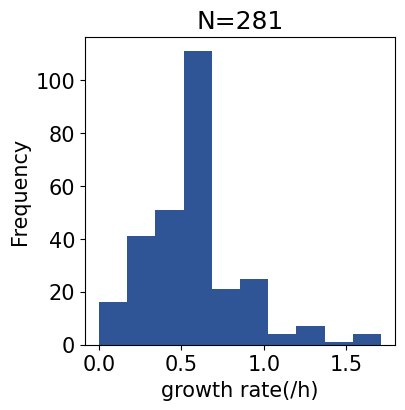

In [7]:
plt.figure(figsize=(4,4))
plt.rcParams["font.size"] = 15
plt.hist(log_data["growth rate"],color="#2F5597")
plt.xlabel("growth rate(/h)")
plt.ylabel("Frequency")
plt.title("N={}".format(len(log_data["growth rate"])))
plt.savefig("./result/histgram.pdf",bbox_inches='tight')

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(log_data)

pca_data = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

pca_data.to_csv("./result/pca_data.csv")
pca_data

,PC1,PC2
0,0.202016,-2.222574
1,0.183847,-2.197630
2,0.192402,-2.209375
3,0.190046,-2.206140
4,0.208831,-2.231930
...,...,...
276,-0.166958,2.259364
277,-0.162436,2.253155
278,-0.166174,2.258287
279,-0.161571,2.251967


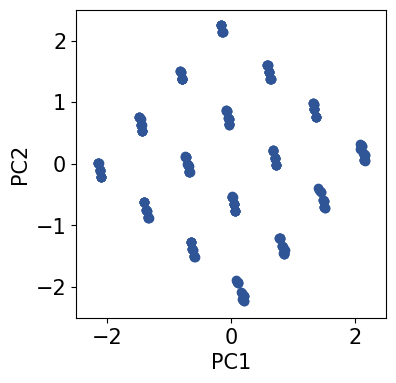

In [9]:
plt.figure(figsize=(4,4))
plt.rcParams["font.size"] = 15
plt.scatter(pca_data["PC1"],pca_data["PC2"],color="#2F5597")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.xlim(-2.5,2.5)
plt.ylim(-2.5,2.5)
plt.savefig("./result/pca.pdf",bbox_inches='tight')


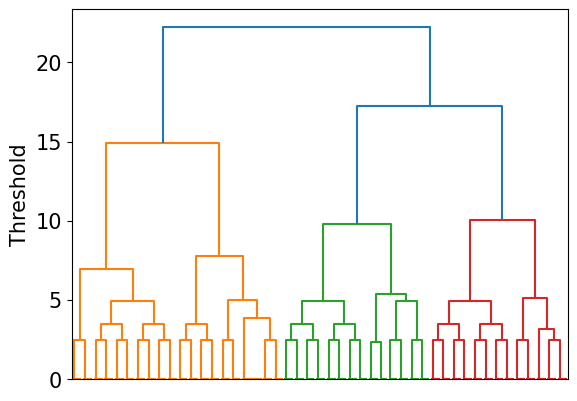

In [10]:
cluster1 = linkage(log_data[features],method="ward",metric= "euclidean") 
dendrogram(cluster1,no_labels=True)
plt.ylabel("Threshold")
plt.savefig("./result/cluster1.pdf",bbox_inches='tight')

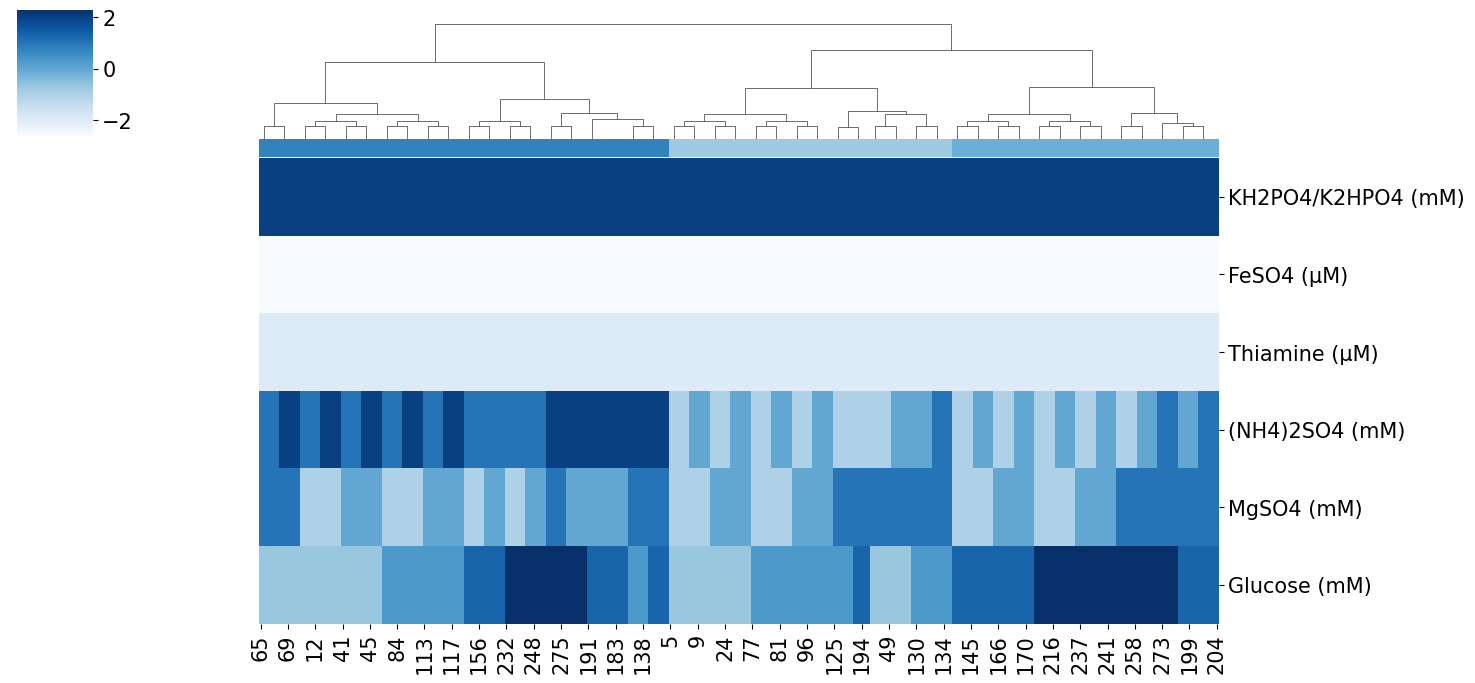

In [11]:
n_clusters=3 #前図で出力される図からクラスター数を判断する

# モデル訓練
hir_clus  = AgglomerativeClustering(n_clusters = n_clusters, affinity = 'euclidean', linkage = 'ward')
c_hir_clus = hir_clus.fit(log_data[features])

#色の設定
c_pal=sns.color_palette("tab20c",desat=1)
color_set = c_pal.as_hex()[0:n_clusters]
c_list = [color_set[value] for value in c_hir_clus.labels_]

#階層的クラスタリング
sns.clustermap(log_data[features].T,figsize=(15,7), method='ward', metric='euclidean', 
                                                           row_cluster=False, col_linkage=cluster1, cmap="Blues", col_colors=c_list)
plt.savefig("./result/cluster2.pdf",bbox_inches='tight')

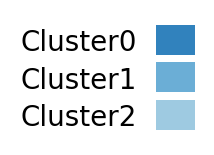

In [12]:
mpl.style.use('default')

fig,ax = plt.subplots(figsize=(1.3, 0.2*n_clusters),dpi=200)
plt.subplots_adjust(left=0.75,right=0.9,top=0.98,bottom=0.02)

plt.barh(["Cluster"+str(i) for i in range(n_clusters)][::-1],[1]*len(color_set),color=color_set[::-1])
plt.xlim(0,1)

plt.tick_params(bottom=False,left=False,right=False,top=False,labelbottom=False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.savefig("./result/cluster2_legend.pdf",bbox_inches='tight')

In [13]:
cluster_data=data.copy()
cluster_data["cluster"]=c_hir_clus.labels_
cluster_data.to_csv("./result/cluster_data.csv")
cluster_data

,KH2PO4/K2HPO4 (mM),FeSO4 (μM),Thiamine (μM),(NH4)2SO4 (mM),MgSO4 (mM),Glucose (mM),growth rate,cluster
0,100,0.0025,0.011,0.1,0.1,0.2,1.052616,2
1,100,0.0025,0.011,0.1,0.1,0.2,0.761912,2
2,100,0.0025,0.011,0.1,0.1,0.2,0.898790,2
3,100,0.0025,0.011,0.1,0.1,0.2,0.861089,2
4,100,0.0025,0.011,0.1,0.1,0.2,1.161656,2
...,...,...,...,...,...,...,...,...
276,100,0.0025,0.011,100.0,10.0,200.0,0.525598,0
277,100,0.0025,0.011,100.0,10.0,200.0,0.597957,0
278,100,0.0025,0.011,100.0,10.0,200.0,0.538152,0
279,100,0.0025,0.011,100.0,10.0,200.0,0.611799,0


C:\Users\hashizume\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


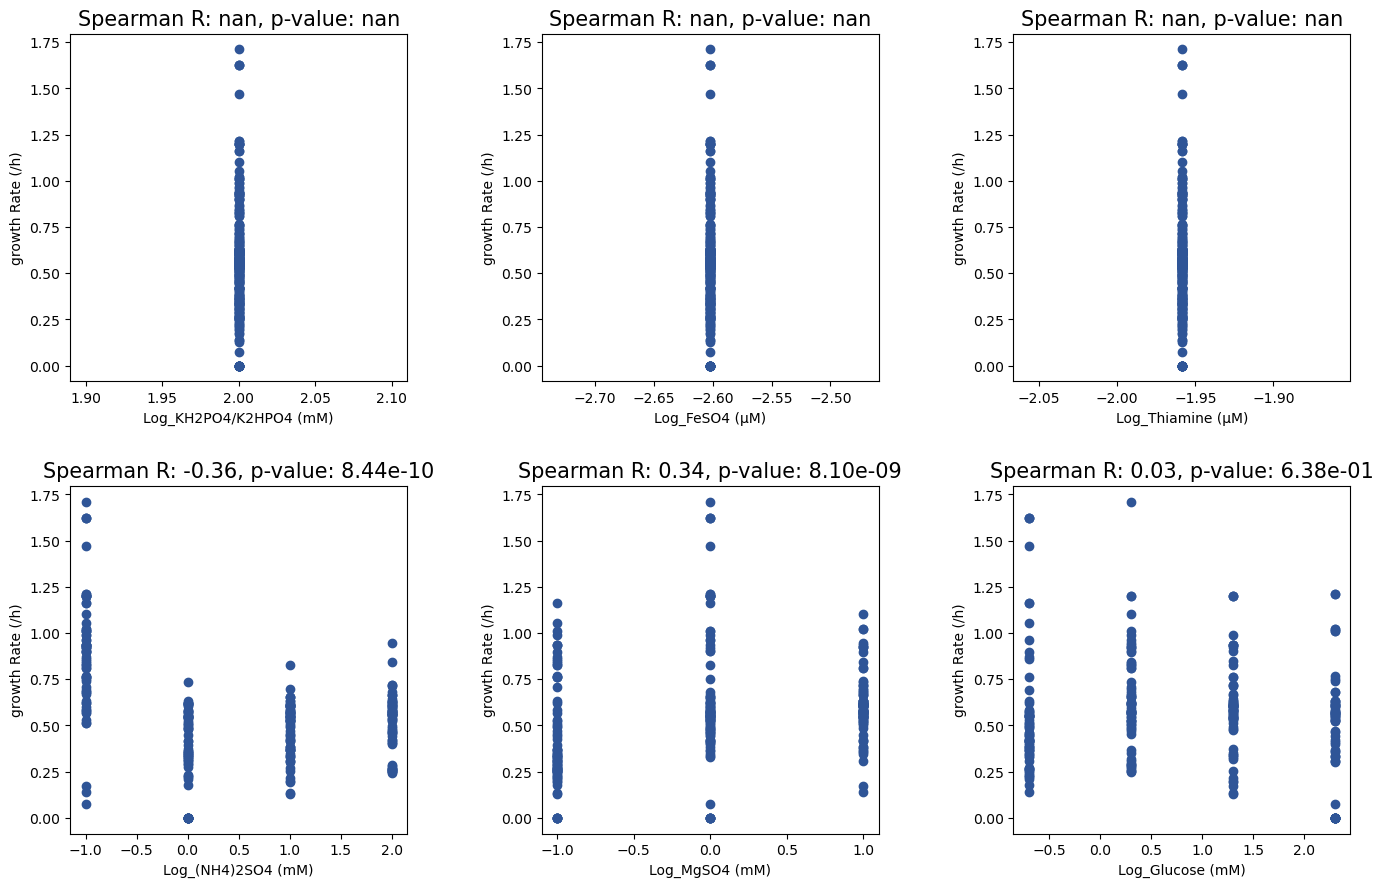

In [14]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

for i, column in enumerate(features):
    
    corr_coef, p_value = spearmanr(log_data[column], log_data['growth rate'])
    
    row = i // 3
    col = i % 3
    
   
    axes[row, col].scatter(log_data[column],log_data['growth rate'], color='#2F5597')
    axes[row, col].set_title(f'Spearman R: {corr_coef:.2f}, p-value: {p_value:.2e}',fontsize=15)
    axes[row, col].set_xlabel("Log_"+column)
    axes[row, col].set_ylabel('growth Rate (/h)')
    
    
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, hspace=0.3, wspace=0.4)
plt.savefig("./result/correlation.pdf",bbox_inches='tight')

In [15]:
df_X = sm.add_constant(log_data[features])
df_y = log_data["growth rate"]
model = sm.OLS(df_y, df_X)
result = model.fit()
multiple_regression=result.summary()

with open("./result/multiple_regression_summary.txt", "w") as file:
    file.write(multiple_regression.as_text())
    
print(multiple_regression)

                            OLS Regression Results                            
Dep. Variable:            growth rate   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     28.85
Date:                Wed, 18 Sep 2024   Prob (F-statistic):           2.92e-16
Time:                        16:37:54   Log-Likelihood:                -13.271
No. Observations:                 281   AIC:                             34.54
Df Residuals:                     277   BIC:                             49.09
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
KH2PO4/K2HPO4 (mM)     0.0873      0

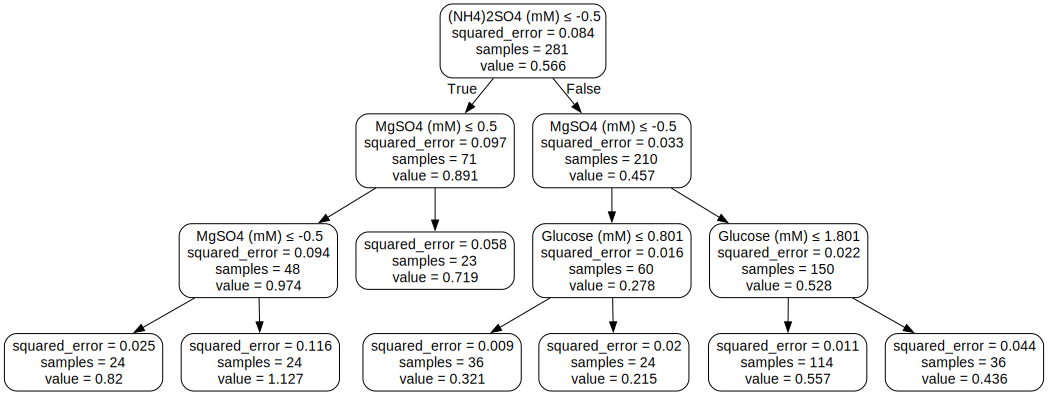

'result\\decision_tree.pdf'

In [16]:
tree_model = tree.DecisionTreeRegressor(max_depth=3,min_samples_leaf=15) 
clf = tree_model.fit(log_data[features], log_data["growth rate"]) 


dot_data = export_graphviz(clf, out_file=None, 
                           feature_names=features,
                           filled=False, rounded=True, special_characters=True,fontname="Arial") 

graph = graphviz.Source(dot_data)

display(graph)

graph = graphviz.Source(dot_data, format="pdf") 
graph.render("./result/decision_tree") 